# Will I get a first in this module?

Our problem is simple.

**inputs**:
- lecture attendance percentage;
- hours spent on coursework;
- hours spent on exam



**outputs**:
- will i get a first? yes / no


We want to now build a model that can predict this, given some new input data.

### Downloading data

In [2]:
!wget -O lectures_percentage.txt https://github.com/s-sd/EMS741/raw/refs/heads/main/tutorials/practical_dl/lectures_percentage.txt
!wget -O hours_cw.txt https://github.com/s-sd/EMS741/raw/refs/heads/main/tutorials/practical_dl/hours_cw.txt
!wget -O hours_exam.txt https://github.com/s-sd/EMS741/raw/refs/heads/main/tutorials/practical_dl/hours_exam.txt

!wget -O labels.txt https://github.com/s-sd/EMS741/raw/refs/heads/main/tutorials/practical_dl/labels.txt

--2026-02-11 13:32:06--  https://github.com/s-sd/EMS741/raw/refs/heads/main/tutorials/practical_dl/lectures_percentage.txt
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/s-sd/EMS741/refs/heads/main/tutorials/practical_dl/lectures_percentage.txt [following]
--2026-02-11 13:32:06--  https://raw.githubusercontent.com/s-sd/EMS741/refs/heads/main/tutorials/practical_dl/lectures_percentage.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12500 (12K) [text/plain]
Saving to: ‘lectures_percentage.txt’

lectures_percentage 100%[===================>]  12.21K  --.-KB/s    in 0s      

2026-02-11 13:32:0

In [3]:
!ls

hours_cw.txt  hours_exam.txt  labels.txt  lectures_percentage.txt  sample_data


### Import relevant modules

In [12]:
!pip install torch

import torch
import numpy as np
import matplotlib.pyplot as plt

### Load the data and normalise it to range 0-1

In [7]:
# checking data attributes

hours_cw = np.loadtxt('hours_cw.txt')
hours_exam = np.loadtxt('hours_exam.txt')
lectures_percentage = np.loadtxt('lectures_percentage.txt')

labels = np.loadtxt('labels.txt')

print('cw min/max: ', np.amin(hours_cw), '|', np.amax(hours_cw))
print('exam min/max: ', np.amin(hours_exam), '|', np.amax(hours_exam))
print('lectures min/max: ', np.amin(lectures_percentage), '|', np.amax(lectures_percentage))

print('labels min/max: ', np.amin(labels), '|', np.amax(labels))

cw min/max:  0.0 | 10.0
exam min/max:  0.05 | 9.97
lectures min/max:  0.3 | 1.0
labels min/max:  0.0 | 1.0


In [8]:
# normalising or scaling

hours_cw_norm = hours_cw / np.ceil(np.amax(hours_cw))
hours_exam_norm = hours_exam / np.ceil(np.amax(hours_exam))
lectures_percentage_norm = lectures_percentage / np.ceil(np.amax(lectures_percentage))

x1 = hours_cw_norm
x2 = hours_exam_norm
x3 = lectures_percentage_norm

y = labels

### Constrct input x and output y

In [9]:
x1_final = np.expand_dims(x1, axis=-1)
x2_final = np.expand_dims(x2, axis=-1)
x3_final = np.expand_dims(x3, axis=-1)

x = np.concatenate([x1_final, x2_final, x3_final], axis=-1)
print('X shape: ', x.shape)

print('Y shape: ', y.shape)

X shape:  (500, 3)
Y shape:  (500,)


### Split into train, val and test sets (ratios 0.6, 0.2, 0.2)

In [10]:
# Shuffle the data randomly
indexes = np.random.permutation(len(x))
x_final = x[indexes]
y_final = y[indexes]

# split into train, val and test sets
train_val_test_ratio = [0.6, 0.2, 0.2]

train_index_start = 0
train_index_end = int(train_val_test_ratio[0] * len(x))

val_index_start = train_index_end
val_index_end = val_index_start + int(train_val_test_ratio[1] * len(x))

test_index_start = val_index_end
test_index_end = test_index_start + int(train_val_test_ratio[2] * len(x))


x_train, y_train = x_final[train_index_start:train_index_end], y_final[train_index_start:train_index_end]

x_val, y_val = x_final[val_index_start:val_index_end], y_final[val_index_start:val_index_end]

x_test, y_test = x_final[test_index_start:test_index_end], y_final[test_index_start:test_index_end]


print("Train:", x_train.shape, y_train.shape)
print("Val:", x_val.shape, y_val.shape)
print("Test: ", x_test.shape,  y_test.shape)


Train: (300, 3) (300,)
Val: (100, 3) (100,)
Test:  (100, 3) (100,)


### Build, train and evaluate a perceptron for this task

/tmp/ipython-input-3459716636.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(my_array, dtype=torch.float32)


Epoch 01/16 - loss: 0.7151 - val_loss: 0.5220
Epoch 02/16 - loss: 0.5555 - val_loss: 0.4869
Epoch 03/16 - loss: 0.5038 - val_loss: 0.4274
Epoch 04/16 - loss: 0.4630 - val_loss: 0.3817
Epoch 05/16 - loss: 0.4265 - val_loss: 0.3597
Epoch 06/16 - loss: 0.3971 - val_loss: 0.3264
Epoch 07/16 - loss: 0.3772 - val_loss: 0.3155
Epoch 08/16 - loss: 0.3591 - val_loss: 0.2972
Epoch 09/16 - loss: 0.3402 - val_loss: 0.2797
Epoch 10/16 - loss: 0.3248 - val_loss: 0.2592
Epoch 11/16 - loss: 0.3113 - val_loss: 0.2551
Epoch 12/16 - loss: 0.2990 - val_loss: 0.2368
Epoch 13/16 - loss: 0.2908 - val_loss: 0.2465
Epoch 14/16 - loss: 0.2787 - val_loss: 0.2182
Epoch 15/16 - loss: 0.2681 - val_loss: 0.2175
Epoch 16/16 - loss: 0.2588 - val_loss: 0.2055


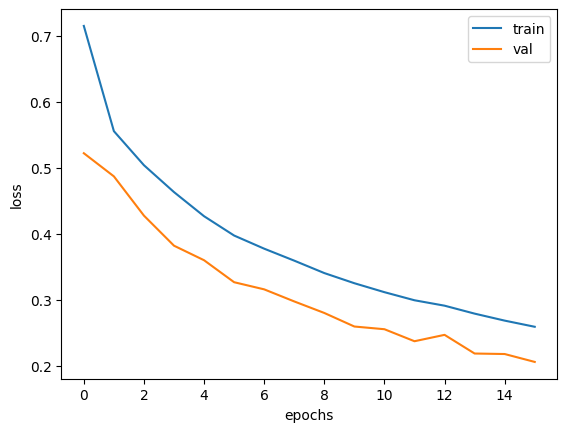


 ------------------------------- 
Test accuracy: 0.920
------------------------------- 



In [16]:

def as_float(my_array):
    return torch.tensor(my_array, dtype=torch.float32)

x_train = as_float(x_train)
y_train = as_float(y_train).view(-1, 1)

x_val   = as_float(x_val)
y_val   = as_float(y_val).view(-1, 1)

x_test  = as_float(x_test)
y_test  = as_float(y_test).view(-1, 1)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
x_train, y_train = x_train.to(device), y_train.to(device)
x_val, y_val     = x_val.to(device), y_val.to(device)
x_test, y_test   = x_test.to(device), y_test.to(device)

# --- model (class-based) ---
class Perceptron(torch.nn.Module):
    def __init__(self, in_dim=3):
        super().__init__()
        self.fc = torch.nn.Linear(in_dim, 1)

    def forward(self, x):
        return torch.sigmoid(self.fc(x))

model = Perceptron(in_dim=3).to(device)

criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

epochs = 16
batch_size = 16
train_losses, val_losses = [], []

# simple training loop (manual batching)
for epoch in range(epochs):
    model.train()
    perm = torch.randperm(x_train.size(0), device=device)  # shuffle
    x_shuf, y_shuf = x_train[perm], y_train[perm]

    total = 0.0
    for i in range(0, x_shuf.size(0), batch_size):
        xb = x_shuf[i:i+batch_size]
        yb = y_shuf[i:i+batch_size]

        optimizer.zero_grad()
        loss = criterion(model(xb), yb)
        loss.backward()
        optimizer.step()

        total += loss.item() * xb.size(0)

    train_loss = total / x_train.size(0)
    train_losses.append(train_loss)

    model.eval()
    with torch.no_grad():
        val_loss = criterion(model(x_val), y_val).item()
    val_losses.append(val_loss)

    print(f"Epoch {epoch+1:02d}/{epochs} - loss: {train_loss:.4f} - val_loss: {val_loss:.4f}")

# --- plot losses ---
plt.plot(train_losses)
plt.plot(val_losses)
plt.legend(["train", "val"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

# --- evaluate ---
model.eval()
with torch.no_grad():
    probs = model(x_test)
    preds = (probs >= 0.5).float()
    acc = (preds == y_test).float().mean().item()

print("\n ------------------------------- ")
print(f"Test accuracy: {acc:.3f}")
print("------------------------------- \n")

### Build, train and evaluate a single-layer neural network for this task (hidden layer activations should be relu)

Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_21 (InputLayer)     │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 16)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/16
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8053 - loss: 0.5564 - val_accuracy: 0.8000 - val_loss: 0.4272
Epoch 2/16
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8460 - loss: 0.3297 - val_accuracy: 0.8000 - val_loss: 0.3272
Epoch 3/16
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8162 - loss: 0.2681 - val_accuracy: 0.9300 - val_loss: 0.2496
Epoch 4/16
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9362 - loss: 0.2207 - val_accuracy: 0.9300 - val_loss: 0.1966
Epoch 5/16
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9113 - loss: 0.1815 - val_accuracy: 0.9000 - val_loss: 0.1893
Epoch 6/16
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9355 - loss: 0.1534 - val_accuracy: 0.9300 - val_loss: 0.1625
Epoch 7/16
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9429 - loss: 0.1306 - val_accuracy: 0.9000 - val_loss: 0.1785
Epoch 8/16
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9596 - loss: 0.1103 - val_accuracy: 0.9500 - val_loss

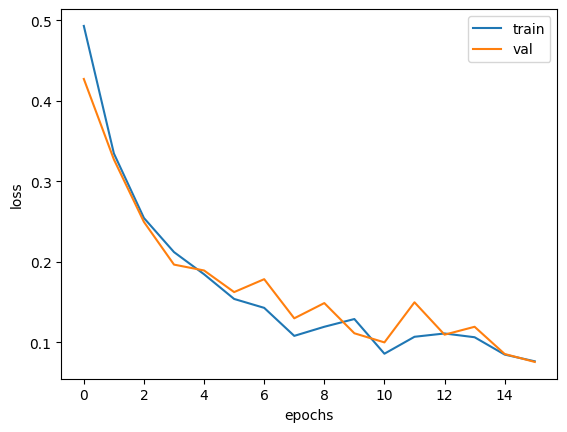

/tmp/ipython-input-2421194308.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(my_array, dtype=torch.float32)


Epoch 01/16 - loss: 0.5965 - val_loss: 0.4264
Epoch 02/16 - loss: 0.4329 - val_loss: 0.3542
Epoch 03/16 - loss: 0.3491 - val_loss: 0.2407
Epoch 04/16 - loss: 0.2797 - val_loss: 0.1922
Epoch 05/16 - loss: 0.2301 - val_loss: 0.1570
Epoch 06/16 - loss: 0.1873 - val_loss: 0.1090
Epoch 07/16 - loss: 0.1419 - val_loss: 0.0888
Epoch 08/16 - loss: 0.1287 - val_loss: 0.1048
Epoch 09/16 - loss: 0.1103 - val_loss: 0.1175
Epoch 10/16 - loss: 0.1562 - val_loss: 0.0930
Epoch 11/16 - loss: 0.1069 - val_loss: 0.0657
Epoch 12/16 - loss: 0.0772 - val_loss: 0.0555
Epoch 13/16 - loss: 0.0739 - val_loss: 0.0733
Epoch 14/16 - loss: 0.0912 - val_loss: 0.0535
Epoch 15/16 - loss: 0.0890 - val_loss: 0.0652
Epoch 16/16 - loss: 0.0719 - val_loss: 0.0358


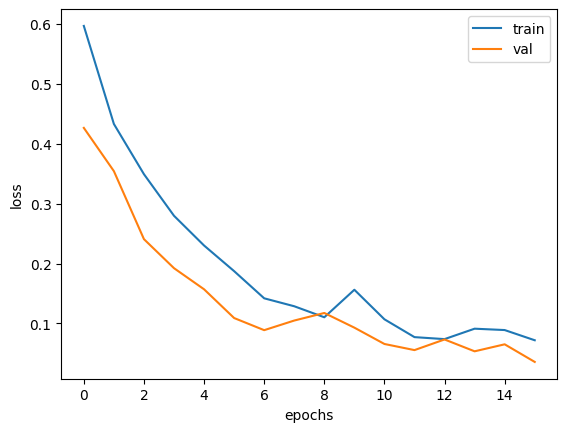


 ------------------------------- 
Test accuracy: 0.990
------------------------------- 



In [17]:

def as_float(my_array):
    return torch.tensor(my_array, dtype=torch.float32)

x_train = as_float(x_train)
y_train = as_float(y_train).view(-1, 1)

x_val   = as_float(x_val)
y_val   = as_float(y_val).view(-1, 1)

x_test  = as_float(x_test)
y_test  = as_float(y_test).view(-1, 1)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
x_train, y_train = x_train.to(device), y_train.to(device)
x_val, y_val     = x_val.to(device), y_val.to(device)
x_test, y_test   = x_test.to(device), y_test.to(device)

# --- model (class-based) ---
class NeuralNet(torch.nn.Module):
    def __init__(self, in_dim=3):
        super().__init__()
        self.hidden = torch.nn.Linear(in_dim, 16)
        self.output = torch.nn.Linear(16, 1)

    def forward(self, x):
        x = torch.relu(self.hidden(x))
        x = torch.sigmoid(self.output(x))
        return x

model = NeuralNet(in_dim=3).to(device)

criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

epochs = 16
batch_size = 16
train_losses, val_losses = [], []

# simple training loop (manual batching)
for epoch in range(epochs):
    model.train()
    perm = torch.randperm(x_train.size(0), device=device)  # shuffle
    x_shuf, y_shuf = x_train[perm], y_train[perm]

    total = 0.0
    for i in range(0, x_shuf.size(0), batch_size):
        xb = x_shuf[i:i+batch_size]
        yb = y_shuf[i:i+batch_size]

        optimizer.zero_grad()
        loss = criterion(model(xb), yb)
        loss.backward()
        optimizer.step()

        total += loss.item() * xb.size(0)

    train_loss = total / x_train.size(0)
    train_losses.append(train_loss)

    model.eval()
    with torch.no_grad():
        val_loss = criterion(model(x_val), y_val).item()
    val_losses.append(val_loss)

    print(f"Epoch {epoch+1:02d}/{epochs} - loss: {train_loss:.4f} - val_loss: {val_loss:.4f}")

# --- plot losses ---
plt.plot(train_losses)
plt.plot(val_losses)
plt.legend(["train", "val"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

# --- evaluate ---
model.eval()
with torch.no_grad():
    probs = model(x_test)
    preds = (probs >= 0.5).float()
    acc = (preds == y_test).float().mean().item()

print("\n ------------------------------- ")
print(f"Test accuracy: {acc:.3f}")
print("------------------------------- \n")

### Build, train and evaluate a deep neural network for this task (hidden layer activations should be relu)

/tmp/ipython-input-1195894548.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(my_array, dtype=torch.float32)


Epoch 01/16 - loss: 0.4246 - val_loss: 0.4757
Epoch 02/16 - loss: 0.4140 - val_loss: 0.2801
Epoch 03/16 - loss: 0.2418 - val_loss: 0.2173
Epoch 04/16 - loss: 0.2217 - val_loss: 0.3777
Epoch 05/16 - loss: 0.3223 - val_loss: 0.2196
Epoch 06/16 - loss: 0.2547 - val_loss: 0.1225
Epoch 07/16 - loss: 0.2105 - val_loss: 0.1397
Epoch 08/16 - loss: 0.1313 - val_loss: 0.1433
Epoch 09/16 - loss: 0.3918 - val_loss: 0.2235
Epoch 10/16 - loss: 0.1216 - val_loss: 0.2658
Epoch 11/16 - loss: 0.4150 - val_loss: 0.2041
Epoch 12/16 - loss: 0.2104 - val_loss: 0.1182
Epoch 13/16 - loss: 0.1256 - val_loss: 0.0553
Epoch 14/16 - loss: 0.0914 - val_loss: 0.0562
Epoch 15/16 - loss: 0.0758 - val_loss: 0.0700
Epoch 16/16 - loss: 0.0671 - val_loss: 0.1531


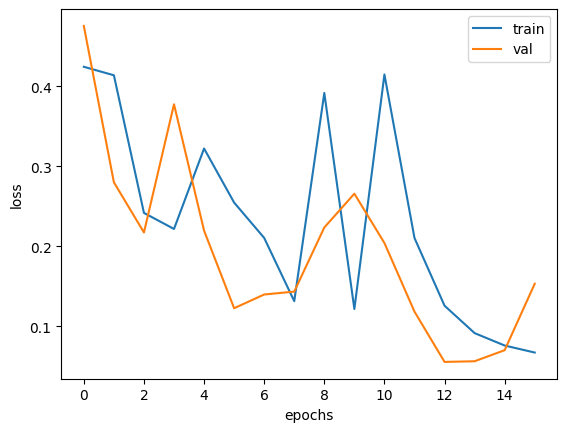


 ------------------------------- 
Test accuracy: 0.900
------------------------------- 



In [19]:

def as_float(my_array):
    return torch.tensor(my_array, dtype=torch.float32)

x_train = as_float(x_train)
y_train = as_float(y_train).view(-1, 1)

x_val   = as_float(x_val)
y_val   = as_float(y_val).view(-1, 1)

x_test  = as_float(x_test)
y_test  = as_float(y_test).view(-1, 1)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
x_train, y_train = x_train.to(device), y_train.to(device)
x_val, y_val     = x_val.to(device), y_val.to(device)
x_test, y_test   = x_test.to(device), y_test.to(device)

# --- model (class-based) ---
class NeuralNet(torch.nn.Module):
    def __init__(self, in_dim=3):
        super().__init__()
        self.fc1 = torch.nn.Linear(in_dim, 16)
        self.fc2 = torch.nn.Linear(16, 32)
        self.fc3 = torch.nn.Linear(32, 16)
        self.out = torch.nn.Linear(16, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.sigmoid(self.out(x))
        return x


model = NeuralNet(in_dim=3).to(device)

criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

epochs = 16
batch_size = 16
train_losses, val_losses = [], []

# simple training loop (manual batching)
for epoch in range(epochs):
    model.train()
    perm = torch.randperm(x_train.size(0), device=device)  # shuffle
    x_shuf, y_shuf = x_train[perm], y_train[perm]

    total = 0.0
    for i in range(0, x_shuf.size(0), batch_size):
        xb = x_shuf[i:i+batch_size]
        yb = y_shuf[i:i+batch_size]

        optimizer.zero_grad()
        loss = criterion(model(xb), yb)
        loss.backward()
        optimizer.step()

        total += loss.item() * xb.size(0)

    train_loss = total / x_train.size(0)
    train_losses.append(train_loss)

    model.eval()
    with torch.no_grad():
        val_loss = criterion(model(x_val), y_val).item()
    val_losses.append(val_loss)

    print(f"Epoch {epoch+1:02d}/{epochs} - loss: {train_loss:.4f} - val_loss: {val_loss:.4f}")

# --- plot losses ---
plt.plot(train_losses)
plt.plot(val_losses)
plt.legend(["train", "val"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

# --- evaluate ---
model.eval()
with torch.no_grad():
    probs = model(x_test)
    preds = (probs >= 0.5).float()
    acc = (preds == y_test).float().mean().item()

print("\n ------------------------------- ")
print(f"Test accuracy: {acc:.3f}")
print("------------------------------- \n")

### Comment on the differences and performance of each

- Overfitting or underfitting and how you diagnosed and solved it in the deep neural network
- Which model performs best
- Put your expected details into one model and see if you will get a first

In [24]:
# putting expected details in to model

my_hours_cw = 8
my_hours_exam = 6
my_lectures_percentage = 0.9

my_x1 = my_hours_cw / np.ceil(np.amax(hours_cw))
my_x2 = my_hours_exam / np.ceil(np.amax(hours_exam))
my_x3 = my_lectures_percentage / np.ceil(np.amax(lectures_percentage))

my_x1_final = np.expand_dims(my_x1, axis=-1)
my_x2_final = np.expand_dims(my_x2, axis=-1)
my_x3_final = np.expand_dims(my_x3, axis=-1)

my_x = np.concatenate([my_x1_final, my_x2_final, my_x3_final], axis=-1)
my_x = np.expand_dims(my_x, axis=0)

my_x = torch.tensor(my_x, dtype=torch.float32)

my_y_pred = model(my_x)

print('My probability of getting a first: ', my_y_pred.detach().numpy())
print('My final outcome for getting a first: ', np.round(my_y_pred.detach().numpy()))


My probability of getting a first:  [[0.92437154]]
My final outcome for getting a first:  [[1.]]


In [ ]:
# for solving overfitting, use dropout layers (rate=0.5) in between hidden layers e.g., as below

# class NeuralNet(torch.nn.Module):
#     def __init__(self, in_dim=3):
#         super().__init__()
#         self.fc1 = torch.nn.Linear(in_dim, 16)
#         self.fc2 = torch.nn.Linear(16, 32)
#         self.fc3 = torch.nn.Linear(32, 16)
#         self.out = torch.nn.Linear(16, 1)

#         self.dropout = torch.nn.Dropout(p=0.5)

#     def forward(self, x):
#         x = torch.relu(self.fc1(x))
#         x = self.dropout(x)

#         x = torch.relu(self.fc2(x))
#         x = self.dropout(x)

#         x = torch.relu(self.fc3(x))
#         x = self.dropout(x)

#         x = torch.sigmoid(self.out(x))
#         return x


# for underfitting, increase number of model parameters